# QuTiP example: Landau-Zener-Stuckelberg inteferometry

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from qutip import *
from qutip.ui.progressbar import TextProgressBar as ProgressBar

Landau-Zener-Stuckelberg interferometry: Steady state of a strongly driven two-level system, using the one-period propagator. 

In [5]:
# set up the parameters and start calculation
delta  = 1.0  * 2 * np.pi  # qubit sigma_x coefficient
w      = 2.0  * 2 * np.pi  # driving frequency
T      = 2 * np.pi / w     # driving period 
gamma1 = 0.00001        # relaxation rate
gamma2 = 0.005          # dephasing  rate

eps_list = np.linspace(-20.0, 20.0, 101) * 2 * np.pi
A_list   = np.linspace(  0.0, 20.0, 101) * 2 * np.pi

# pre-calculate the necessary operators
sx = sigmax(); sz = sigmaz(); sm = destroy(2); sn = num(2)

# collapse operators
c_op_list = [np.sqrt(gamma1) * sm, np.sqrt(gamma2) * sz]  # relaxation and dephasing

In [6]:
# ODE settings (for list-str format)
options = Options()
options.rhs_reuse = True
options.atol = 1e-6 # reduce accuracy to speed
options.rtol = 1e-5 # up the calculation a bit

In [7]:
# for function-callback style time-dependence
def hamiltonian_t(t, args):
    """ evaluate the hamiltonian at time t. """
    H0 = args[0]
    H1 = args[1]
    w  = args[2]
    return H0 + H1 * np.sin(w * t)

In [8]:
# perform the calculation for each combination of eps and A, store the result
# in a matrix
def calculate():

    p_mat = np.zeros((len(eps_list), len(A_list)))

    pbar = ProgressBar(len(eps_list))
    
    for m, eps in enumerate(eps_list):
        H0 = - delta/2.0 * sx - eps/2.0 * sz

        pbar.update(m)

        for n, A in enumerate(A_list):
            H1 = (A/2) * sz

            # function callback format
            #args = (H0, H1, w); H_td = hamiltonian_t

            # list-str format
            #args = {'w': w}; H_td = [H0, [H1, 'sin(w * t)']]

            # list-function format
            args = w; H_td = [H0, [H1, lambda t, w: np.sin(w * t)]]

            U = propagator(H_td, T, c_op_list, args, options)
            rho_ss = propagator_steadystate(U)

            p_mat[m,n] = np.real(expect(sn, rho_ss))

    return p_mat

In [9]:
p_mat = calculate()

10.9%. Run time: 110.27s. Est. time left: 00:00:15:02
20.8%. Run time: 175.55s. Est. time left: 00:00:11:08
30.7%. Run time: 235.74s. Est. time left: 00:00:08:52
40.6%. Run time: 296.38s. Est. time left: 00:00:07:13
50.5%. Run time: 353.54s. Est. time left: 00:00:05:46
60.4%. Run time: 415.11s. Est. time left: 00:00:04:32
70.3%. Run time: 474.25s. Est. time left: 00:00:03:20
80.2%. Run time: 545.30s. Est. time left: 00:00:02:14
90.1%. Run time: 676.78s. Est. time left: 00:00:01:14


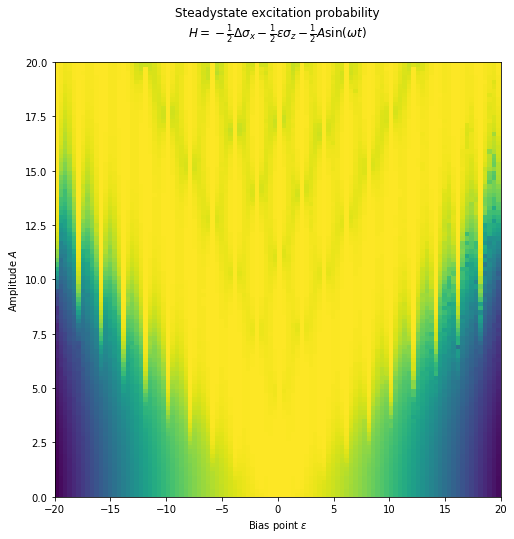

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))

A_mat, eps_mat = np.meshgrid(A_list/(2*np.pi), eps_list/(2*np.pi))

ax.pcolor(eps_mat, A_mat, p_mat)
ax.set_xlabel(r'Bias point $\epsilon$')
ax.set_ylabel(r'Amplitude $A$')
ax.set_title("Steadystate excitation probability\n" +
             r'$H = -\frac{1}{2}\Delta\sigma_x -\frac{1}{2}\epsilon\sigma_z - \frac{1}{2}A\sin(\omega t)$' + "\n");

## Versions

In [11]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.2.0
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.25.2
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
